In [1]:
import sys
import os

sys.path.insert(0, "/home/workspace/tissdiss")
from utils import *

In [12]:
h5_paths = "/home/workspace/tissdiss/data/EXP-00998_REAMP_h5s"
h5_files = glob.glob(os.path.join(h5_paths, "*.h5"))

adatas = {}

for h5_file in h5_files:
    n = h5_file.split("/")[-1].split("_")[2]
    adata = sc.read_10x_h5(h5_file)
    adata.var_names_make_unique()
    adatas[n] = adata

    adatas[n].var["mt"] = adatas[n].var_names.str.startswith("MT-")
    adatas[n].var["ribo"] = adatas[n].var_names.str.startswith(("RPS", "RPL"))
    adatas[n].var["ig"] = adatas[n].var_names.str.startswith("IG")
    adatas[n].var["hb"] = adatas[n].var_names.str.contains(("^HB[^(P)]"))

    sc.pp.calculate_qc_metrics(adatas[n], qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True)

    n_components = min(29, adatas[n].n_vars - 1, adatas[n].n_obs - 1)
    sc.pp.scrublet(adatas[n], n_prin_comps=n_components)

    sc.pp.normalize_total(adatas[n])
    sc.pp.log1p(adatas[n])

    adatas[n].obs['sample'] = n

adata = ad.concat(adatas.values(), join='outer', merge='same')

sc.pp.highly_variable_genes(adata)
sc.pp.scale(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/workspace/environment/tissdiss_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/workspace/environment/tissdiss_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/workspace/environment/tissdiss_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/workspace/environment/tissdiss_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/workspace/environment/tissdiss_env/lib/python3.9/site-packages

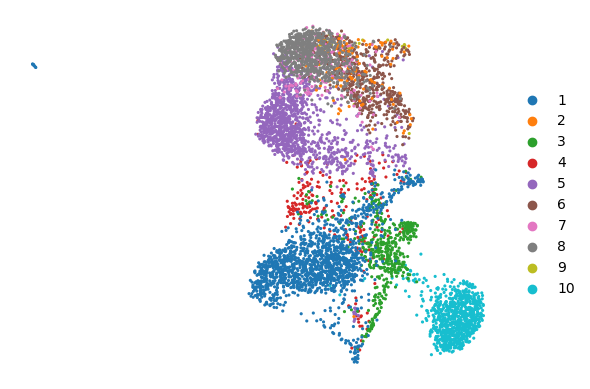

In [13]:
sc.pl.umap(
    adata,
    color='sample',
    frameon=False,
    title=''
)